In [31]:
# import libraries 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
#import racplusplus
import pickle
from scipy.cluster import hierarchy
import math

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [134]:
my_colors = ['#88292F', '#697268', '#12355B', '#D7816A']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', my_colors)

my_colors_2 = ['#FDE74C', '#c33b43', '#697268', '#9DBF9E', '#cd5a61', '#343934', '#c91e29','#12355B','#64a0e0', '#D7816A', '#913d27', '#F46036', '#5386E4',  '#bea602', '#0a6682', '#215463']
custom_cmap_2 = LinearSegmentedColormap.from_list('custom_cmap_2', my_colors_2)

In [17]:
# import clean data set

df_wind = pd.read_csv('../../../data_analysis_and_preproc/intermediate/wind/final_wind_df.csv')

In [18]:
df_wind.head()

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
0,11,2021-01-01 00:00:00,8.3,296.0,802.0,15.51,-2.0,9.0,1
1,11,2021-01-01 00:20:00,8.1,298.0,666.0,14.88,-2.0,10.0,1
2,11,2021-01-01 04:20:00,5.1,297.0,137.0,9.45,-3.0,10.0,1
3,11,2021-01-01 14:20:00,7.8,301.0,614.0,14.51,-2.0,11.0,1
4,11,2021-01-01 14:40:00,7.7,301.0,611.0,14.60,-2.0,10.0,1


In [19]:
df_wind.dtypes

asset_id                  int64
read_at                  object
wind_speed              float64
wind_direction          float64
power_average           float64
rotation_average        float64
exterior_temperature    float64
nacelle_temperature     float64
farm                      int64
dtype: object

In [20]:
for column in df_wind.columns:
    if df_wind[column].dtype == float:
        df_wind[column] = df_wind[column].round().astype(int)

In [21]:
df_wind.head()

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1
1,11,2021-01-01 00:20:00,8,298,666,15,-2,10,1
2,11,2021-01-01 04:20:00,5,297,137,9,-3,10,1
3,11,2021-01-01 14:20:00,8,301,614,15,-2,11,1
4,11,2021-01-01 14:40:00,8,301,611,15,-2,10,1


In [22]:
np.random.seed(42)

asset = df_wind['asset_id'].unique()[0]

length = len(df_wind[df_wind['asset_id'] == asset])

# Define the desired size of the subset (e.g., 10% of the original dataset)
subset_size = int(0.01 * length)  # Adjust the percentage as needed

# Group the DataFrame by the asset identifier column(s)
grouped = df_wind.groupby('asset_id')

# Initialize an empty list to store the sampled data
subset_data = []

# Iterate over each group, sample subset_size rows from each group, and append to subset_data
for _, group_df in grouped:
    sampled_group = group_df.sample(n=subset_size, replace=False)
    subset_data.append(sampled_group)

# Concatenate the sampled data from all groups into a single DataFrame
df_subset = pd.concat(subset_data)

In [23]:
df_subset = df_subset.reset_index(drop=True)

In [24]:
n_components = 2
pca = PCA(n_components=n_components)

In [25]:
X = df_subset.iloc[:,2:-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

X_pca = pca.fit_transform(X_scaled)

In [26]:
# len(df_subset[df_subset['asset_id']==11])

In [27]:
# Plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [28]:
X_scaled

,0,1,2,3,4,5
0,1.168284,0.060189,1.659634,1.381902,-0.479202,-0.958510
1,-0.815280,-0.810656,-0.831681,-1.020123,0.535922,0.986095
2,-0.815280,1.103235,-0.831681,-1.020123,1.986099,2.671419
3,-0.484686,-1.779901,-0.660813,-0.486340,-0.914255,-0.051027
4,0.176502,-1.607700,-0.041417,0.848119,-0.189166,0.208253
...,...,...,...,...,...,...
44796,-0.484686,0.650592,-0.549443,-0.753231,0.100869,-0.310308
44797,1.498878,0.217630,1.998319,0.581227,-0.044148,-0.699229
44798,-0.815280,0.886753,-0.744721,-1.020123,1.115993,0.986095
44799,1.829472,0.680112,2.126469,0.581227,-0.044148,-0.569589


# Hierarchical clustering

## Aglomerative

### Single Link

In [29]:
# # Assuming X_scaled is your DataFrame containing the data
# batch_size = 2000  # Adjusted batch size
# total_samples = len(X_scaled)
# number_of_batches = math.ceil(total_samples/batch_size)
# unique_assets = X_scaled['asset_id'].unique()

# remaining_indices = set(X_scaled.index)
# combined_labels = []
# combined_data = pd.DataFrame()

# for i in range(number_of_batches):
#     if len(remaining_indices) < batch_size:
#         batch_size = len(remaining_indices)
        
#     sampled_indices = np.random.choice(list(remaining_indices), batch_size, replace=False)
#     remaining_indices -= set(sampled_indices)

#     batch_df = X_scaled.loc[sampled_indices].copy()  # Make a copy to avoid SettingWithCopyWarning

#     # Append the batch_df to combined DataFrame
#     combined_data = pd.concat([combined_data, batch_df], ignore_index=True)

#     print(f'Batch n.{i} out of {number_of_batches}')

# Fit Agglomerative Clustering model on the combined data
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model_single.fit(np.array(X_scaled))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

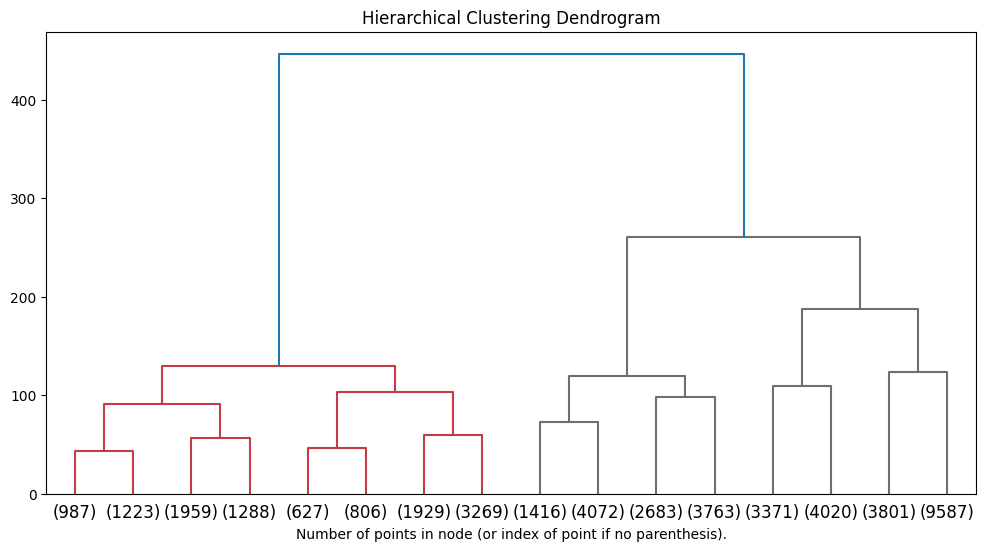

In [39]:
hierarchy.set_link_color_palette(my_colors_2)

plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the dendrogram
plot_dendrogram(model_single, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [71]:
# Cut dendrogram to obtain labels
num_clusters = 71/3  # Adjust as needed

# Convert the children_ attribute to a scipy hierarchical tree
linkage_matrix = np.column_stack([model_single.children_, model_single.distances_,
                                  np.ones_like(model_single.distances_)])
# Cut the tree to obtain labels
labels_cut = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

print(labels_cut)

[ 7  8 11 ... 11  7 10]


In [72]:
X_scaled = X_scaled.drop(columns=['cluster_label', 'asset_id'])

In [73]:
# Assign the cluster labels to the original DataFrame
X_scaled['cluster_label'] = labels_cut
X_scaled['asset_id'] = df_subset['asset_id']

In [75]:
df_wind = df_wind.drop(columns=['cluster_label'])

In [76]:
most_frequent_clusters = X_scaled.groupby('asset_id')['cluster_label'].agg(lambda x: np.bincount(x).argmax())

# Merge the most frequent cluster labels back to the original DataFrame
#df_wind = df_wind.drop(columns='cluster')

df_wind = pd.merge(df_wind, most_frequent_clusters, on='asset_id', how='left')

df_wind.head()

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm,cluster_label
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1,2
1,11,2021-01-01 00:20:00,8,298,666,15,-2,10,1,2
2,11,2021-01-01 04:20:00,5,297,137,9,-3,10,1,2
3,11,2021-01-01 14:20:00,8,301,614,15,-2,11,1,2
4,11,2021-01-01 14:40:00,8,301,611,15,-2,10,1,2


In [77]:
len(most_frequent_clusters.unique())

15

In [78]:
representative_points = df_wind.groupby(['asset_id']).first().reset_index()
representative_points

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm,cluster_label
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1,2
1,12,2021-01-01 00:10:00,8,314,832,16,-1,12,1,1
2,13,2021-01-01 00:00:00,8,-49,749,15,-2,5,1,1
3,14,2021-01-01 00:00:00,9,-38,925,16,-1,15,1,11
4,15,2021-01-01 00:00:00,9,-47,998,16,-2,7,1,1
...,...,...,...,...,...,...,...,...,...,...
66,414,2021-01-02 15:00:00,4,-362,62,8,7,15,4,18
67,415,2021-01-01 00:00:00,4,285,128,9,2,11,4,18
68,510,2021-01-01 00:00:00,8,307,1330,14,1,8,5,19
69,511,2021-01-01 00:00:00,8,301,1311,14,3,11,5,7


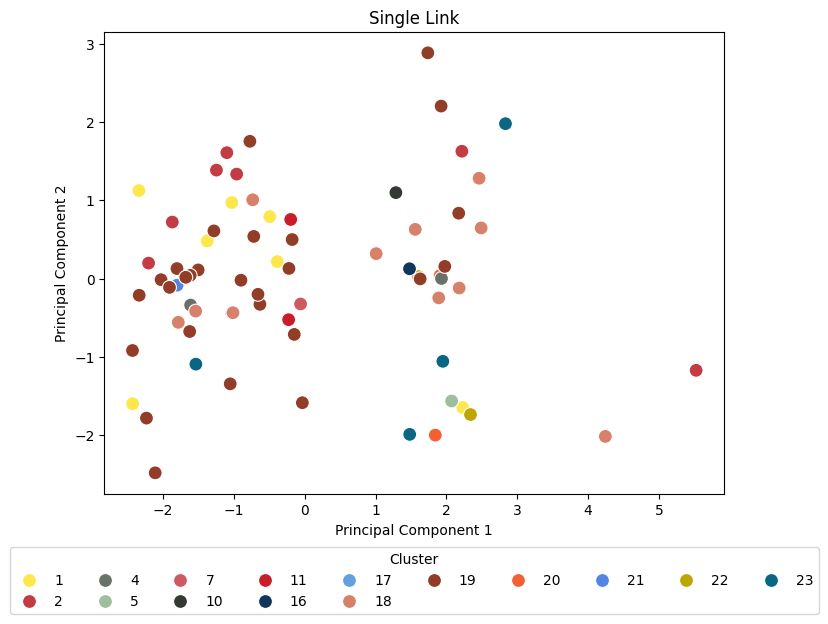

In [89]:
features = ['wind_speed', 'wind_direction', 'power_average', 'rotation_average', 'exterior_temperature', 'nacelle_temperature']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(representative_points[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add 'cluster' column back to DataFrame
pca_df['cluster_label'] = representative_points['cluster_label']

color_palette = sns.color_palette(my_colors_2)

# Plot the representative points on a scatter plot using PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster_label', palette=color_palette, s=100)
plt.title('Single Link')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=10)
plt.show()

In [143]:
with open('results/hierarchical/single_clustering.pickle', 'wb') as f:
    pickle.dump(model_single, f)

In [144]:
df_wind.to_csv('results/hierarchical/single_link.csv')

In [145]:
df_wind = df_wind.drop(columns='cluster_label')

In [92]:
X_scaled = X_scaled.drop(columns=['cluster_label', 'asset_id'])

### Average Link

In [93]:
model_average = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None)
model_average.fit(np.array(X_scaled))

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

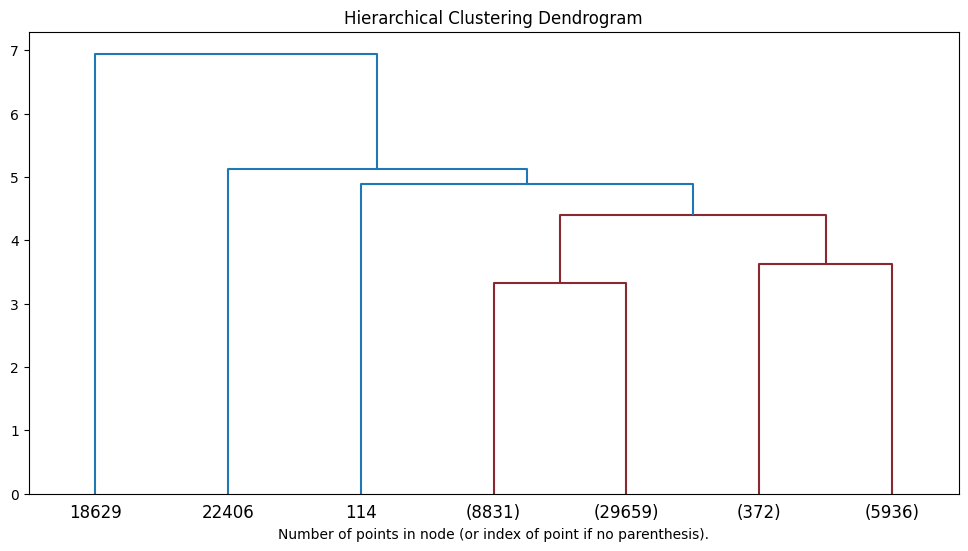

In [95]:
hierarchy.set_link_color_palette(my_colors)

plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the dendrogram
plot_dendrogram(model_average, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [96]:
df_wind.head()

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm,cluster_label
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1,2
1,11,2021-01-01 00:20:00,8,298,666,15,-2,10,1,2
2,11,2021-01-01 04:20:00,5,297,137,9,-3,10,1,2
3,11,2021-01-01 14:20:00,8,301,614,15,-2,11,1,2
4,11,2021-01-01 14:40:00,8,301,611,15,-2,10,1,2


In [97]:
df_wind = df_wind.drop(columns='cluster_label')

In [98]:
# Cut dendrogram to obtain labels
num_clusters = 71*2  # Adjust as needed

# Convert the children_ attribute to a scipy hierarchical tree
linkage_matrix = np.column_stack([model_average.children_, model_average.distances_,
                                  np.ones_like(model_average.distances_)])
# Cut the tree to obtain labels
labels_cut = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

print(labels_cut)

[ 83  37  14 ...  15 103  16]


In [99]:
# Assign the cluster labels to the original DataFrame
X_scaled['cluster_label'] = labels_cut

In [102]:
X_scaled['asset_id'] = df_subset['asset_id']

In [ ]:
df_wind = df_wind.drop(columns=['cluster_label_x', 'cluster_label_y', 'cluster_label'])

In [103]:
most_frequent_clusters = X_scaled.groupby('asset_id')['cluster_label'].agg(lambda x: np.bincount(x).argmax())

# Merge the most frequent cluster labels back to the original DataFrame
#df_wind = df_wind.drop(columns='cluster')

df_wind = pd.merge(df_wind, most_frequent_clusters, on='asset_id', how='left')

df_wind.head()



,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm,cluster_label
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1,37
1,11,2021-01-01 00:20:00,8,298,666,15,-2,10,1,37
2,11,2021-01-01 04:20:00,5,297,137,9,-3,10,1,37
3,11,2021-01-01 14:20:00,8,301,614,15,-2,11,1,37
4,11,2021-01-01 14:40:00,8,301,611,15,-2,10,1,37


In [104]:
len(most_frequent_clusters.unique())

12

In [105]:
representative_points = df_wind.groupby(['asset_id']).first().reset_index()
representative_points

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm,cluster_label
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1,37
1,12,2021-01-01 00:10:00,8,314,832,16,-1,12,1,74
2,13,2021-01-01 00:00:00,8,-49,749,15,-2,5,1,35
3,14,2021-01-01 00:00:00,9,-38,925,16,-1,15,1,34
4,15,2021-01-01 00:00:00,9,-47,998,16,-2,7,1,37
...,...,...,...,...,...,...,...,...,...,...
66,414,2021-01-02 15:00:00,4,-362,62,8,7,15,4,74
67,415,2021-01-01 00:00:00,4,285,128,9,2,11,4,54
68,510,2021-01-01 00:00:00,8,307,1330,14,1,8,5,74
69,511,2021-01-01 00:00:00,8,301,1311,14,3,11,5,83


/tmp/ipykernel_8162/4154262498.py:21: UserWarning: The palette list has more values (15) than needed (12), which may not be intended.
  sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster_label', palette=color_palette, s=100)


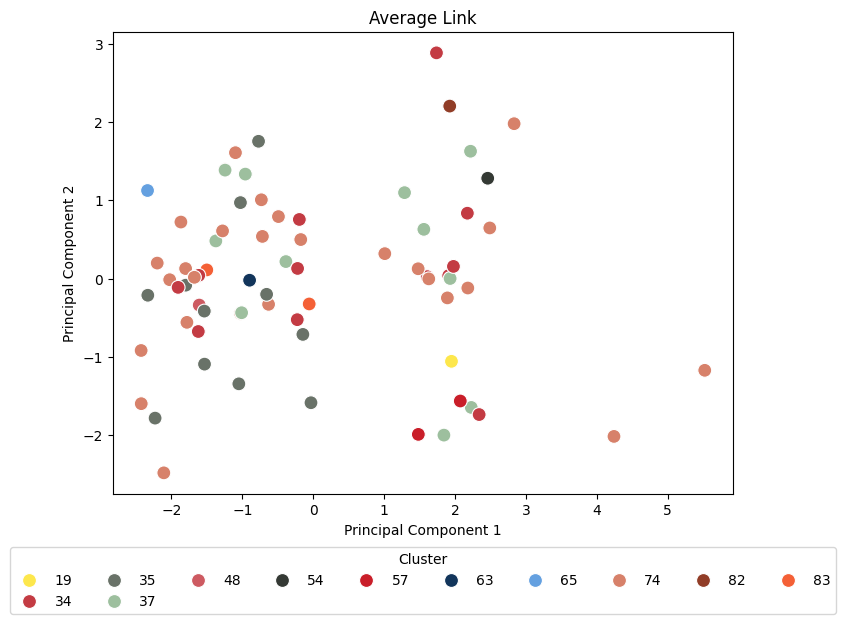

In [106]:
features = ['wind_speed', 'wind_direction', 'power_average', 'rotation_average', 'exterior_temperature', 'nacelle_temperature']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(representative_points[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add 'cluster' column back to DataFrame
pca_df['cluster_label'] = representative_points['cluster_label']

color_palette = sns.color_palette(my_colors_2)

# Plot the representative points on a scatter plot using PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster_label', palette=color_palette, s=100)
plt.title('Average Link')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=10)
plt.show()

In [107]:
with open('results/hierarchical/average_clustering.pickle', 'wb') as f:
    pickle.dump(model_average, f)

In [108]:
df_wind.to_csv('results/hierarchical/average_link.csv')

In [109]:
df_wind = df_wind.drop(columns='cluster_label')

In [112]:
X_scaled = X_scaled.drop(columns=['cluster_label', 'asset_id'])

### Ward's method

In [113]:
model_ward = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None)
model_ward.fit(np.array(X_scaled))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

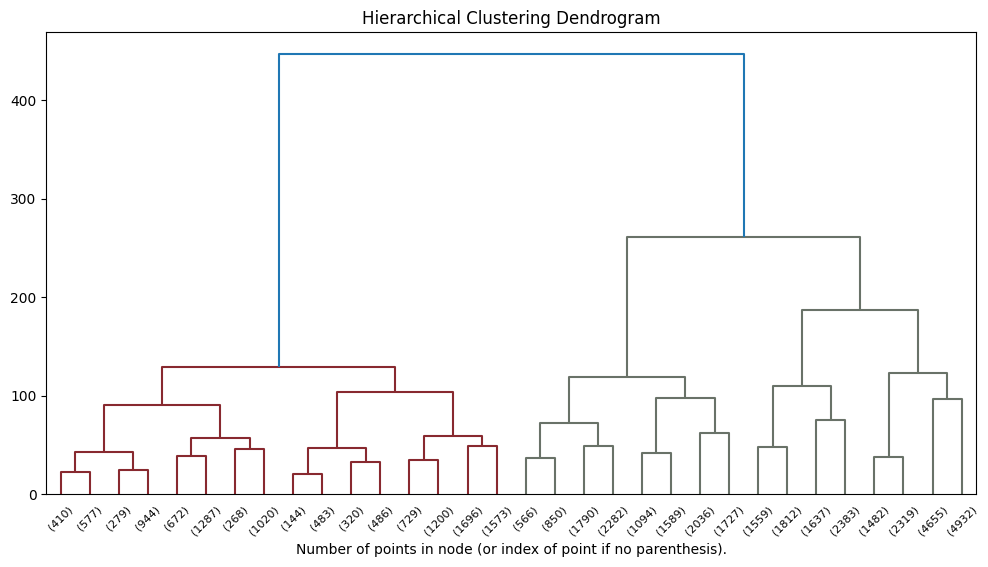

In [114]:
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the dendrogram
plot_dendrogram(model_ward, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [116]:
df_wind.head()

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1
1,11,2021-01-01 00:20:00,8,298,666,15,-2,10,1
2,11,2021-01-01 04:20:00,5,297,137,9,-3,10,1
3,11,2021-01-01 14:20:00,8,301,614,15,-2,11,1
4,11,2021-01-01 14:40:00,8,301,611,15,-2,10,1


In [126]:
X_scaled

,0,1,2,3,4,5,cluster_label,asset_id
0,1.168284,0.060189,1.659634,1.381902,-0.479202,-0.958510,22,11
1,-0.815280,-0.810656,-0.831681,-1.020123,0.535922,0.986095,26,11
2,-0.815280,1.103235,-0.831681,-1.020123,1.986099,2.671419,34,11
3,-0.484686,-1.779901,-0.660813,-0.486340,-0.914255,-0.051027,43,11
4,0.176502,-1.607700,-0.041417,0.848119,-0.189166,0.208253,42,11
...,...,...,...,...,...,...,...,...
44796,-0.484686,0.650592,-0.549443,-0.753231,0.100869,-0.310308,65,512
44797,1.498878,0.217630,1.998319,0.581227,-0.044148,-0.699229,21,512
44798,-0.815280,0.886753,-0.744721,-1.020123,1.115993,0.986095,33,512
44799,1.829472,0.680112,2.126469,0.581227,-0.044148,-0.569589,21,512


In [127]:
X_scaled = X_scaled.drop(columns='cluster_label')

In [128]:
# Cut dendrogram to obtain labels
num_clusters = 71/2  # Adjust as needed

# Convert the children_ attribute to a scipy hierarchical tree
linkage_matrix = np.column_stack([model_ward.children_, model_ward.distances_,
                                  np.ones_like(model_ward.distances_)])
# Cut the tree to obtain labels
labels_cut = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

print(labels_cut)

[11 13 17 ... 17 11 15]


In [129]:
# Assign the cluster labels to the original DataFrame
X_scaled['cluster_label'] = labels_cut

In [130]:
X_scaled['asset_id'] = df_subset['asset_id']

In [132]:
most_frequent_clusters = X_scaled.groupby('asset_id')['cluster_label'].agg(lambda x: np.bincount(x).argmax())

# Merge the most frequent cluster labels back to the original DataFrame
#df_wind = df_wind.drop(columns='cluster')

df_wind = pd.merge(df_wind, most_frequent_clusters, on='asset_id', how='left')

df_wind.head()

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm,cluster_label
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1,9
1,11,2021-01-01 00:20:00,8,298,666,15,-2,10,1,9
2,11,2021-01-01 04:20:00,5,297,137,9,-3,10,1,9
3,11,2021-01-01 14:20:00,8,301,614,15,-2,11,1,9
4,11,2021-01-01 14:40:00,8,301,611,15,-2,10,1,9


In [133]:
len(most_frequent_clusters.unique())

16

In [135]:
representative_points = df_wind.groupby(['asset_id']).first().reset_index()
representative_points

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm,cluster_label
0,11,2021-01-01 00:00:00,8,296,802,16,-2,9,1,9
1,12,2021-01-01 00:10:00,8,314,832,16,-1,12,1,2
2,13,2021-01-01 00:00:00,8,-49,749,15,-2,5,1,9
3,14,2021-01-01 00:00:00,9,-38,925,16,-1,15,1,15
4,15,2021-01-01 00:00:00,9,-47,998,16,-2,7,1,23
...,...,...,...,...,...,...,...,...,...,...
66,414,2021-01-02 15:00:00,4,-362,62,8,7,15,4,23
67,415,2021-01-01 00:00:00,4,285,128,9,2,11,4,15
68,510,2021-01-01 00:00:00,8,307,1330,14,1,8,5,33
69,511,2021-01-01 00:00:00,8,301,1311,14,3,11,5,11


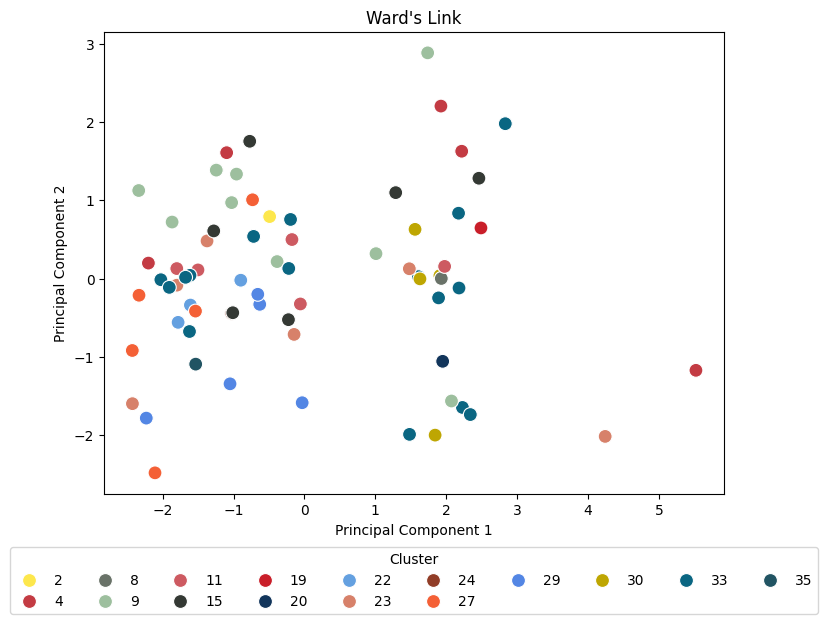

In [137]:
features = ['wind_speed', 'wind_direction', 'power_average', 'rotation_average', 'exterior_temperature', 'nacelle_temperature']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(representative_points[features])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Add 'cluster' column back to DataFrame
pca_df['cluster_label'] = representative_points['cluster_label']

color_palette = sns.color_palette(my_colors_2)

# Plot the representative points on a scatter plot using PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster_label', palette=color_palette, s=100)
plt.title("Ward's Link")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=10)
plt.show()

In [138]:
with open('results/hierarchical/ward_clustering.pickle', 'wb') as f:
    pickle.dump(model_ward, f)

In [139]:
df_wind.to_csv('results/hierarchical/ward_link.csv')

In [140]:
df_wind = df_wind.drop(columns='cluster_label')